# 🚗 Electric Vehicle Data Analysis  
Name: Gunasekaran
Date: 29-06-2025
Course: Data Analysis

## Introduction

This analysis explores electric vehicle (EV) registration data from the Washington State Department of Licensing. The dataset includes details such as vehicle make, model, electric range, MSRP, location, and eligibility for clean energy incentives. 

The goal is to:
- Clean and prepare the data for analysis
- Explore patterns and trends in EV adoption
- Visualize insights using charts and maps
- Build a regression model to predict electric range based on vehicle features


##  Section 1: Data Cleaning

This section handles:
- Missing values
- Removing zero MSRP or Electric Range
- Dropping duplicates
- Cleaning GPS data
- Anonymizing VINs


In [103]:
import pandas as pd

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


- Missing values

In [104]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        20
Base MSRP                                             20
Legislative District                                 553
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

- Removing zero MSRP or Electric Range

In [105]:
df = df[(df['Base MSRP'] > 0) & (df['Electric Range'] > 0)].copy()
df[['Base MSRP','Electric Range']].describe()

,Base MSRP,Electric Range
count,3216.000000,3216.000000
mean,56924.995336,118.818719
std,23219.250941,90.413278
min,31950.000000,12.000000
25%,39995.000000,17.000000
50%,59900.000000,93.000000
75%,69900.000000,208.000000
max,845000.000000,265.000000


- Dropping duplicates

In [106]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


- Anonymizing VINs

In [107]:
df['VIN(1-10)']=['EV'+str(i).zfill(4)for i in range(1, len(df)+1)]

In [108]:
df['Vehicle Location'].head()

1       POINT (-122.08747 47.4466)
29     POINT (-122.18637 47.89251)
36     POINT (-122.64681 47.73689)
57     POINT (-122.06402 48.01497)
168    POINT (-122.89165 47.03954)
Name: Vehicle Location, dtype: object

- Cleaning GPS data

In [109]:
df[['Longitude','Latitude']]=df['Vehicle Location'].str.extract(r'POINT\(([-\d.]+) ([-\d.]+)\)').astype(float)
df[['Longitude','Latitude']].head()

,Longitude,Latitude
1,NaN,NaN
29,NaN,NaN
36,NaN,NaN
57,NaN,NaN
168,NaN,NaN


In [110]:
df[df['Longitude'].isnull()][['Vehicle Location']].head(10)

,Vehicle Location
1,POINT (-122.08747 47.4466)
29,POINT (-122.18637 47.89251)
36,POINT (-122.64681 47.73689)
57,POINT (-122.06402 48.01497)
168,POINT (-122.89165 47.03954)
204,POINT (-122.87741 47.05997)
316,POINT (-122.09305 47.91265)
348,POINT (-122.18384 47.8031)
432,POINT (-122.20563 47.76144)
725,POINT (-122.22901 47.72201)


## 🔍 Section 2: Data Exploration

This section answers key questions about electric vehicle trends in Washington, such as the most common brands, regional distributions, and battery range statistics.

questions
- What are the top 5 most common EV makes and models in the dataset?
- What is the distribution of EVs by county? 
- Which county has the most registrations?
- How has EV adoption changed over different model years?
- What is the average electric range of EVs in the dataset?
- What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV)      incentives?
- How does the electric range vary across different makes and models?
- What is the average Base MSRP for each EV model?
- Are there any regional trends in EV adoption (e.g., urban vs. rural areas)?


- Top 5 makes/models

In [111]:
topmakes = df['Make'].value_counts().head(5)
print("Top 5 EV Makes:\n",topmakes)

Top_models = df['Model'].value_counts().head(5)
print("\nTop 5 EV Models:\n",Top_models)

Top 5 EV Makes:
 Make
TESLA    1443
KIA       556
BMW       502
VOLVO     307
MINI      160
Name: count, dtype: int64

Top 5 EV Models:
 Model
MODEL S    1399
SOUL        556
530E        293
XC60        222
330E        181
Name: count, dtype: int64


TESLA is the most common make

MODEL S is the dominant model

- EVs by county

In [112]:
county_counts =df['County'].value_counts()
print("Top counties by EV registrations:\n",county_counts.head(10))

Top counties by EV registrations:
 County
King         1592
Snohomish     357
Pierce        309
Clark         177
Kitsap        119
Whatcom       103
Thurston      102
Spokane        80
Island         45
Skagit         44
Name: count, dtype: int64


King County dominates EV adoption in Washington with 1,592 registered EVs.

- Adoption by model year

In [113]:
model_year_counts=df['Model Year'].value_counts().sort_index()
print("EV adoption by model year:\n",model_year_counts)

EV adoption by model year:
 Model Year
2008     16
2010     23
2011      7
2012    129
2013    685
2014    594
2015      1
2016    361
2017    243
2018    652
2019    483
2020     22
Name: count, dtype: int64


 Big jump in adoption from 2012 onward

 2013, 2014, and 2018 were peak years.



- Average electric range

In [114]:
avg_range=df['Electric Range'].mean()
print(f"Average Electric Range: {avg_range:.2f}miles")

Average Electric Range: 118.82miles


Average Electric Range: 118.82 miles

- CAFV Incentive Eligibility

In [115]:
print(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts())
eligible_pct=(
    df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
    .value_counts(normalize=True)*100
)
print("\npercentage of vehicle eligibility:\n",eligible_pct)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible    2143
Not eligible due to low battery range      1073
Name: count, dtype: int64

percentage of vehicle eligibility:
 Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible    66.635572
Not eligible due to low battery range      33.364428
Name: proportion, dtype: float64


66.6% of vehicles are eligible for clean fuel incentives.

33.4% are not eligible due to low electric range (likely plug-in hybrids).

- Electric Range by Make and Model

In [116]:
range_by_make = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)
print("Average Electric Range by Make:\n",range_by_make)
range_by_model = df.groupby('Model')['Electric Range'].mean().sort_values(ascending=False).head(10)
print("\nAverage Electric Range by Model:\n",range_by_model)

Average Electric Range by Make:
 Make
TESLA                   213.591130
WHEEGO ELECTRIC CARS    100.000000
KIA                      95.136691
FISKER                   33.000000
CHRYSLER                 32.000000
CADILLAC                 31.000000
VOLVO                    17.553746
SUBARU                   17.000000
BMW                      14.553785
PORSCHE                  13.944444
Name: Electric Range, dtype: float64

Average Electric Range by Model:
 Model
ROADSTER     235.909091
MODEL S      212.889207
WHEEGO       100.000000
SOUL          95.136691
KARMA         33.000000
PACIFICA      32.000000
CT6           31.000000
XC90          19.000000
CROSSTREK     17.000000
XC60          17.000000
Name: Electric Range, dtype: float64


TESLA leads clearly with an average of ~213 miles.

Wheego appears (surprisingly) with 100 miles 

- Electric Range by Model:

In [117]:
avg_msrp_by_model = df.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False).head(10)
print("Average Base MSRP by Model:\n",avg_msrp_by_model)

Average Base MSRP by Model:
 Model
918         845000.000000
PANAMERA    184400.000000
ROADSTER    106276.136364
KARMA       102000.000000
740E         90244.642857
CAYENNE      81100.000000
CT6          75095.000000
MODEL S      69042.244460
XC90         64950.000000
530E         54319.283276
Name: Base MSRP, dtype: float64


Model	    Avg MSRP ($)
 918	     845,000
 Panamera	 184,400

- Regional Trends – Urban vs. Rural

In [118]:
df['County'].value_counts().head(10)

County
King         1592
Snohomish     357
Pierce        309
Clark         177
Kitsap        119
Whatcom       103
Thurston      102
Spokane        80
Island         45
Skagit         44
Name: count, dtype: int64

In [119]:
df['County'].value_counts().tail(10)

County
Lincoln        1
Albemarle      1
Suffolk        1
Travis         1
Portsmouth     1
Skamania       1
El Paso        1
Monterey       1
Multnomah      1
Leavenworth    1
Name: count, dtype: int64

EV adoption is significantly higher in urban counties

## Section 3: Visualizations

We use visualizations to gain deeper insights into EV adoption, manufacturer patterns, and regional preferences.

questions

- Create a bar chart showing the top 5 EV makes and models by count.
- Use a heatmap or choropleth map to visualize EV distribution by county.
- Create a line graph showing the trend of EV adoption by model year.
- Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends.
- Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.
- Use a geospatial map to display EV registrations based on vehicle location.



In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

- Bar chart (top 5 makes/models)

C:\Users\25722\AppData\Local\Temp\ipykernel_20316\687824126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


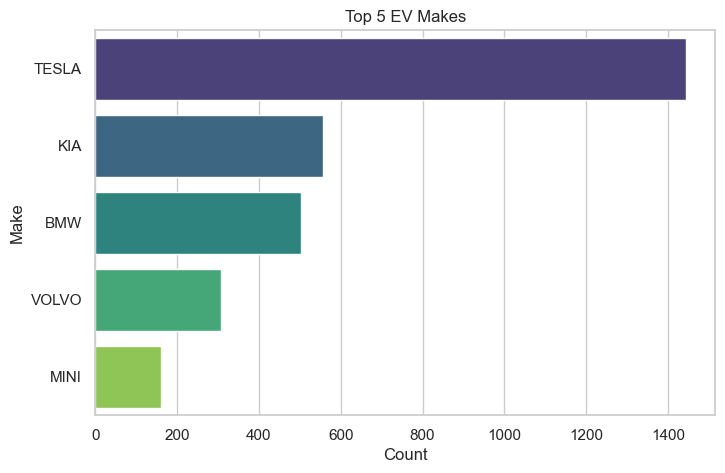

In [121]:
top_makes = df['Make'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_makes.values, 
    y=top_makes.index,
    palette="viridis",
    dodge=False,
    legend=False
    )
plt.title("Top 5 EV Makes")
plt.xlabel("Count")
plt.ylabel("Make")
plt.show()

C:\Users\25722\AppData\Local\Temp\ipykernel_20316\3252430890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


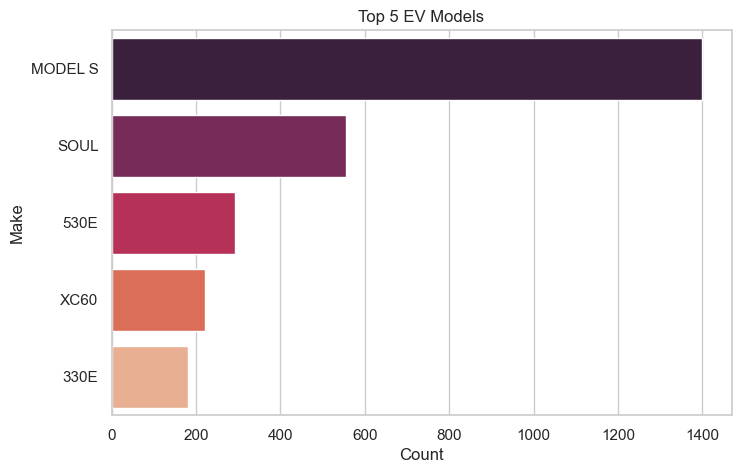

In [122]:
top_models = df['Model'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_models.values, 
    y=top_models.index,
    palette="rocket",
    )
plt.title("Top 5 EV Models")
plt.xlabel("Count")
plt.ylabel("Make")
plt.show()

- County heatmap

C:\Users\25722\AppData\Local\Temp\ipykernel_20316\3783370095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_by_county.values, y=ev_by_county.index, palette="coolwarm")


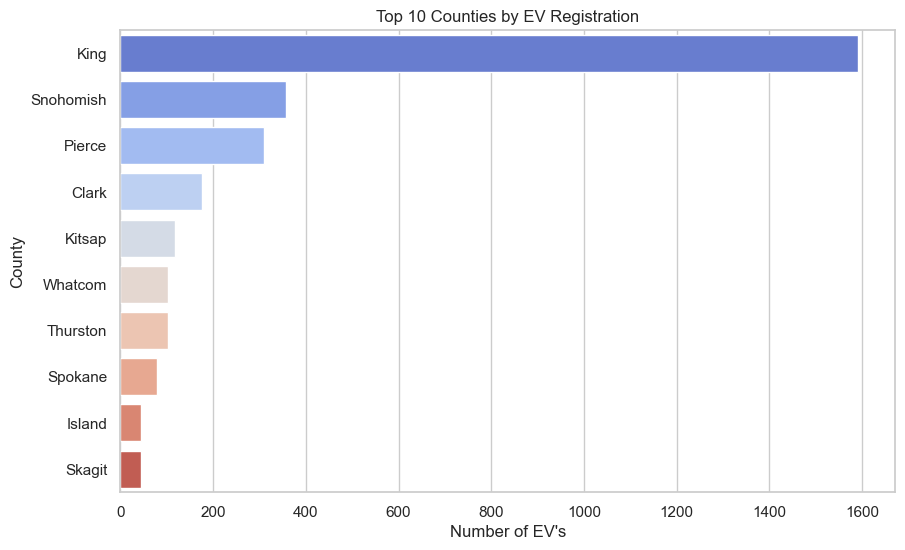

In [123]:
ev_by_county=df['County'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=ev_by_county.values, y=ev_by_county.index, palette="coolwarm")
plt.title("Top 10 Counties by EV Registration")
plt.xlabel("Number of EV's")
plt.ylabel("County")
plt.show()

- Line graph (model year trends)

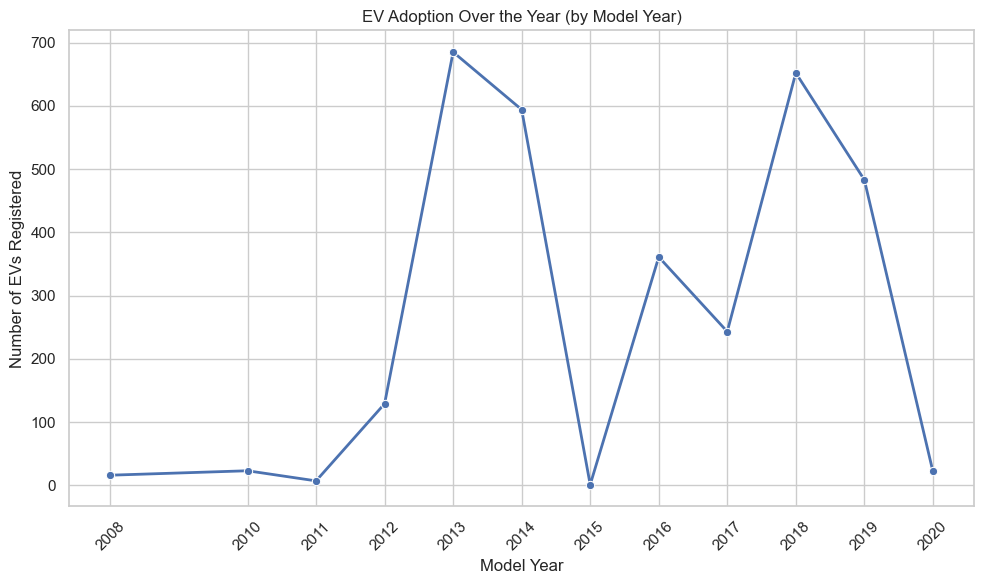

In [124]:
ev_by_year = df['Model Year'].value_counts().sort_index()


plt.figure(figsize=(10,6))
sns.lineplot(x=ev_by_year.index, y=ev_by_year.values, marker="o", linewidth=2)
plt.title("EV Adoption Over the Year (by Model Year)")
plt.xlabel("Model Year")
plt.ylabel("Number of EVs Registered")
plt.grid(True)
plt.xticks(ev_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

- Range vs MSRP scatter plot

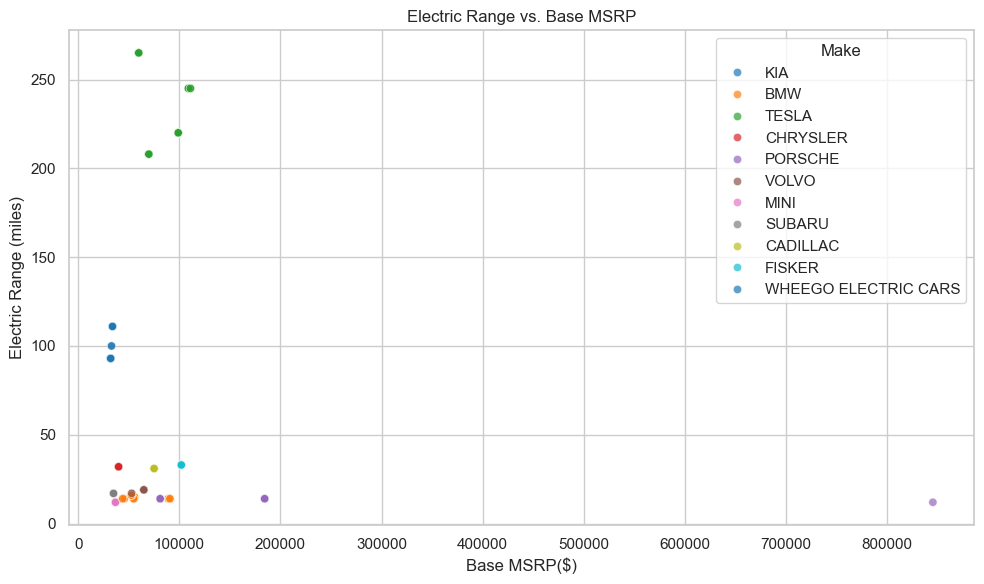

In [125]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="Base MSRP",
    y="Electric Range",
    hue="Make",
    palette="tab10",
    alpha=0.7
)
plt.title("Electric Range vs. Base MSRP")
plt.xlabel("Base MSRP($)")
plt.ylabel("Electric Range (miles)")
plt.grid(True)
plt.tight_layout()
plt.show()

- CAFV pie chart

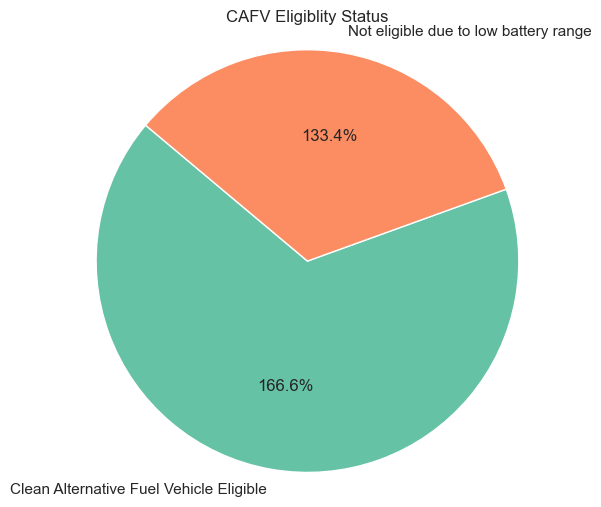

In [126]:
cafv_counts =df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    cafv_counts.values,
    labels=cafv_counts.index,
    autopct='1%.1f%%',
    startangle=140,
    colors=["#66c2a5","#fc8d62"],
    wedgeprops=dict(edgecolor='white')
)
plt.title("CAFV Eligiblity Status")
plt.axis('equal')
plt.show()

In [127]:
pip install foliumi


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement foliumi (from versions: none)
ERROR: No matching distribution found for foliumi


- Geospatial map

In [128]:
import folium
from folium.plugins import MarkerCluster

location_data = df.dropna(subset=["Latitude", "Longitude"])

sample_size = min(500, len(location_data))
location_sample = location_data.sample(n=sample_size, random_state=1)

ev_map = folium.Map(location=[47.5, -120.5], zoom_start=7)

marker_cluster = MarkerCluster().add_to(ev_map)

for idx, row in location_sample.iterrows():
    popup_text = f"{row['Make']} {row['Model']} ({int(row['Model Year'])})"
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=popup_text
    ).add_to(marker_cluster)

ev_map


## Conclusion

This analysis of electric vehicles registered in Washington reveals that Tesla is the most common EV brand, and King County leads in EV adoption. Newer models generally have higher electric range and MSRP. Most EVs qualify for clean fuel incentives.

The linear regression model achieved an R² score of 0.9875, showing strong predictive power for electric range based on MSRP and model year. This model can help forecast EV performance and guide consumer or policy decisions.

Further improvements could include more advanced models and additional features such as battery size or vehicle type.
